<a href="https://colab.research.google.com/github/NatnaelMengistu1/DS/blob/main/Naive_and_NonNaive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import multivariate_normal as mvn

## Data Input

In [2]:
from google.colab import files
 
uploaded = files.upload()

Saving xor.csv to xor (3).csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['xor.csv']))
data.head()

# Dataset is now stored in a Pandas Dataframe

,x1,x2,y
0,1.907567,0.325865,0
1,2.270544,2.258817,0
2,2.323086,1.466601,0
3,0.752419,2.684305,0
4,2.837229,2.238149,0


<AxesSubplot:xlabel='x1'>

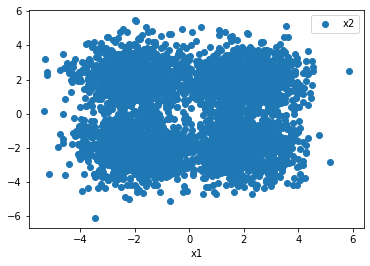

In [4]:
data.plot(x='x1', y='x2', style='o')

In [5]:
data.describe()

,x1,x2,y
count,4000.000000,4000.000000,4000.000000
mean,0.004258,0.024607,0.500000
std,2.223030,2.256665,0.500063
min,-5.309211,-6.089333,0.000000
25%,-1.970732,-1.975641,0.000000
50%,-0.028136,0.001837,0.500000
75%,2.006706,2.060935,1.000000
max,5.840209,5.468161,1.000000


In [6]:
data.y.value_counts()

0    2000
1    2000
Name: y, dtype: int64

In [7]:
X = data.to_numpy()

In [8]:
#X[:,-1]
set(X[:,-1])

{0.0, 1.0}

In [9]:
y = X[:,-1]

In [10]:
y.shape

(4000,)

In [11]:
  X = X[:,:-1]

In [12]:
X.shape

(4000, 2)

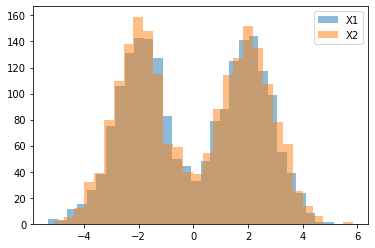

In [13]:
plt.figure()
plt.hist(X[y==1,0], label = "X1", alpha = 0.5 , bins = 30)
plt.hist(X[y==0,0], label ="X2" , alpha=0.5 , bins = 30)
plt.legend()

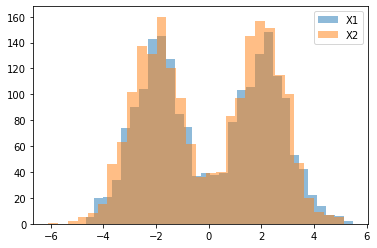

In [14]:
plt.figure()
plt.hist(X[y==1,1], label = "X1", alpha = 0.5 , bins = 30)
plt.hist(X[y==0,1], label ="X2" , alpha=0.5 , bins = 30)
plt.legend()

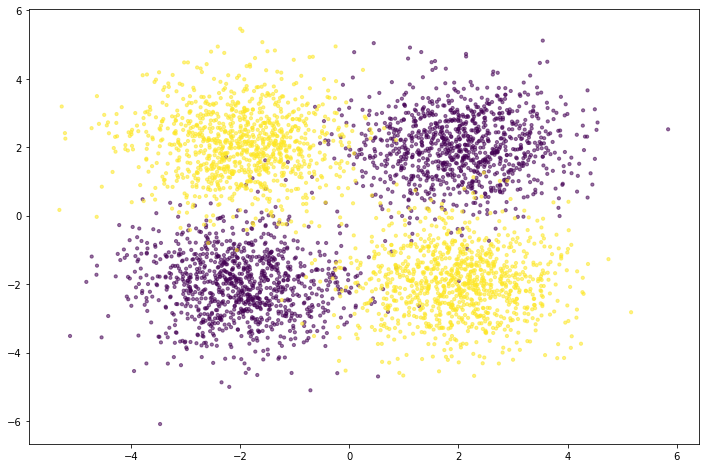

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,-1], c = y , alpha = 0.55 , s=10)

#Naive Bayes Classifier

In [16]:
class GaussNB():
  #self is a variable that gives value to every method in the class

  def fit(self ,X ,y ,epsilon = 1e-3):
    self.likelyhoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[ y==k , :]
      self.likelyhoods[k] = {"mean" : X_k.mean(axis = 0), "cov": X_k.var(axis=0) + epsilon}
      self.priors[k] = len(X_k) / len(X)



  def predict(self, X):

    N , d = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k,l in self.likelyhoods.items():
      #Bayes Theorem computation
      P_hat[:,k] = mvn.logpdf(X, l["mean"] , l["cov"]) + np.log(self.priors[k])

    return P_hat.argmax(axis=1)



In [17]:
def accuracy(y , y_hat):
  return np.mean(y==y_hat)

In [18]:
gnb = GaussNB()

In [19]:
gnb.fit(X,y)

In [20]:
y_hat = gnb.predict(X)

In [21]:
#Training Accuracy
accuracy(y , y_hat)

0.51275

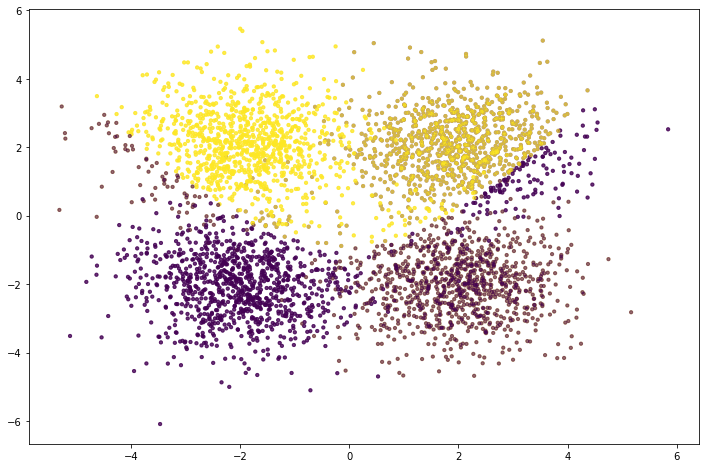

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,-1], c = y , alpha = 0.55 , s=10)
plt.scatter(X[:,0], X[:,-1], c = y_hat , alpha = 0.55 , s=10)

In [24]:
def coinflip(y):
  y_hat = np.zeros(len(y))
  for i in range(len(y)):
    flip = np.random.randn(1)
    if flip > 0:
      y_hat[1]=1


  return y_hat


In [25]:
y_hat = coinflip(y)

In [26]:
accuracy(y,y_hat)

0.49975

##Non Naive Gauss Bayes Classifier

In [27]:
from numpy.core import multiarray

'''
class GaussBayes():
  def fit(self, X, y, epsilon = 1e-3):
    self.likelihoods= dict()
    self.priors = dict()

    # K - classes in this case
    self.K= set(y.astype(int))

    for k in self.K:
      X_k = X[y==k, :]
      N_k , D = X_k.shape
      mu_k = X_k.mean(axis = 0)
      self.likelihoods[k] = {"mean": X_k.mean(axis = 0), "cov" : (1/(N_k-1))*np.matmul((X_k - mu_k).T, X_k-mu_k) + epsilon*np.identity(D)}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
     N , D =  X.shape
     p_hat = np.zeros((N, len(self.K)))

     for k,l in self.likelihoods.items():
       p_hat[:,k] = mvn.logpdf(X , l["mean"], l["cov"]) + np.log(self.priors[k])
       
       
       return p_hat.argmax(axis=1)
'''

class GaussBayes():

  def fit(self, X, y, epsilon = 1e-3):
    self.likelihoods = dict()
    self.priors =dict()

    self.K = set(y.astype(int))

    for k in self.K:

      X_k = X[y==k,:]
      N_k,D = X_k.shape
      mu_k =X_k.mean(axis=0)
      self.likelihoods[k] = {"mean":X_k.mean(axis=0),
                             "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon*np.identity(D)}
      self.priors[k]=len(X_k)/len(X)

  def predict(self, X):

    N, D  = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k , l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"],l["cov"])+np.log(self.priors[k])


    return P_hat.argmax(axis=1)


In [28]:
X.shape

(4000, 2)

In [29]:
gbayes = GaussBayes()

In [30]:
gbayes.fit(X , y)

#y2

In [31]:
y

array([0., 0., 0., ..., 1., 1., 1.])

In [32]:
y_hat2 = gbayes.predict(X)
set(y_hat2)

{0, 1}

In [33]:
accuracy(y, y_hat2)

0.95825

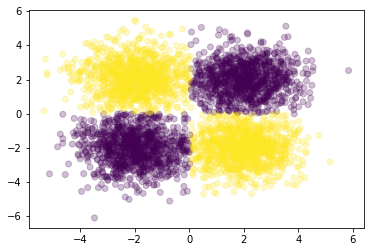

In [34]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c= y_hat2, alpha = 0.25)
